In [41]:
import matplotlib.pyplot as plt
import pycbc
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
import standard_gwtransf as gw
import numpy as np

In [42]:
# data from map parameters: 
# IMR: https://ldas-jobs.ligo.caltech.edu/~abhirup.ghosh/O2/2017/August/14/1186741861p5268/G297595/lalinference/Reruns/20180619_HLV_IMRPPv2_cleaneddataC02_widermcprior_fcut161_seglen16BWPSD_padding16/imrtgr_results/lalinf_imr/posplots.html
# post-inspiral: https://ldas-jobs.ligo.caltech.edu/~abhirup.ghosh/O2/2017/August/14/1186741861p5268/G297595/lalinference/Reruns/20180619_HLV_IMRPPv2_cleaneddataC02_widermcprior_fcut161_seglen16BWPSD_padding16/imrtgr_results/lalinf_ring/posplots.html

apx = 'IMRPhenomPv2'

#m1, m2, spin1z, spin2z, distance, inclination, coa_phase, declination, right_ascension, polarization, end_time
param_set_imr = [34.7300, 27.8286, 0.1046, 0.0162, 601.4853, 0.4639, 1.7985, -0.8287, 0.8060, 1.3699, 1186741861.53]
param_set_ring_secondary = [18.4189, 11.6908, 0.7025, 0.2198, 330.0866, 0.4589, 3.7708, -1.0472, 0.8056, 1.0623, 1186741861.54]
delta_t, f_lower =  1./4096, 20.

mpwvfm_list = ['IMR', 'postinsp_secondary']
param_map = {'IMR':param_set_imr, 'postinsp_secondary':param_set_ring_secondary}
label_map = {'IMR':'primary', 'postinsp_secondary':'secondary'}

outdir = '/home/abhirup/Documents/Work/O2/2017/August/14/1186741861p5268/G297595/lalinference/map_waveforms'

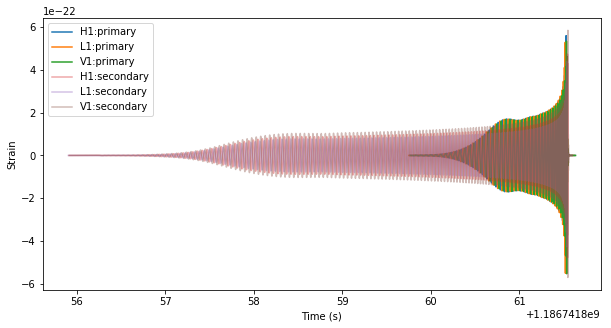

In [43]:
plt.figure(figsize=(10,5))

for (i, mpwvfm) in enumerate(mpwvfm_list):
    
        m1, m2, spin1z, spin2z, distance, inclination, coa_phase, declination, right_ascension, polarization, end_time = param_map[mpwvfm]

        hp, hc = get_td_waveform(approximant=apx,mass1=m1,mass2=m2,spin1z=spin1z,spin2z=spin2z, distance=distance, inclination=inclination,coa_phase=coa_phase,delta_t=delta_t, f_lower=f_lower)

        det_h1 = Detector('H1')
        det_l1 = Detector('L1')
        det_v1 = Detector('V1')
        
        hp.start_time += end_time
        hc.start_time += end_time

        signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
        signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
        signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)
        
        if i == 0:
            alpha = 1
        else:
            alpha = 0.4

        plt.plot(signal_h1.sample_times, signal_h1, label='H1:%s'%label_map[mpwvfm], alpha=alpha)
        plt.plot(signal_l1.sample_times, signal_l1, label='L1:%s'%label_map[mpwvfm], alpha=alpha)
        plt.plot(signal_v1.sample_times, signal_v1, label='V1:%s'%label_map[mpwvfm], alpha=alpha)
        
        np.savetxt(outdir + '/GW170814_map_waveform_%s_peak_H1.dat'%label_map[mpwvfm], np.c_[np.array(signal_h1.sample_times),np.array(signal_h1)], header='t, ht')
        np.savetxt(outdir + '/GW170814_map_waveform_%s_peak_L1.dat'%label_map[mpwvfm], np.c_[np.array(signal_l1.sample_times),np.array(signal_l1)], header='t, ht')
        np.savetxt(outdir + '/GW170814_map_waveform_%s_peak_V1.dat'%label_map[mpwvfm], np.c_[np.array(signal_v1.sample_times),np.array(signal_v1)], header='t, ht')

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()                                     